Author @ysbecca

In [4]:
import matplotlib.pyplot as plt
import urllib.request
from xml.dom import minidom


import fetch_samples as fs
import cv2
import numpy as np
import ysb

In [53]:
urls = ["http://129.11.191.7/Research_4/Slide_Library/NHS_BCSP/Experts_Board/Case_00001/101527.svs",
       "http://129.11.191.7/Research_4/Slide_Library/NHS_BCSP/Experts_Board/Case_00017/118381.svs",
        "http://129.11.191.7/Research_4/Slide_Library/NHS_BCSP/Experts_Board/Case_00023/119576.svs"]
image_ids = [101527, 118381, 119576]
paths = []
for image_id in image_ids:
    paths.append("/Users/ysbecca/Google Drive/University of Leeds/PhD/NHS BCSP/annotations 21-5-18/" + str(image_id) + ".xml")

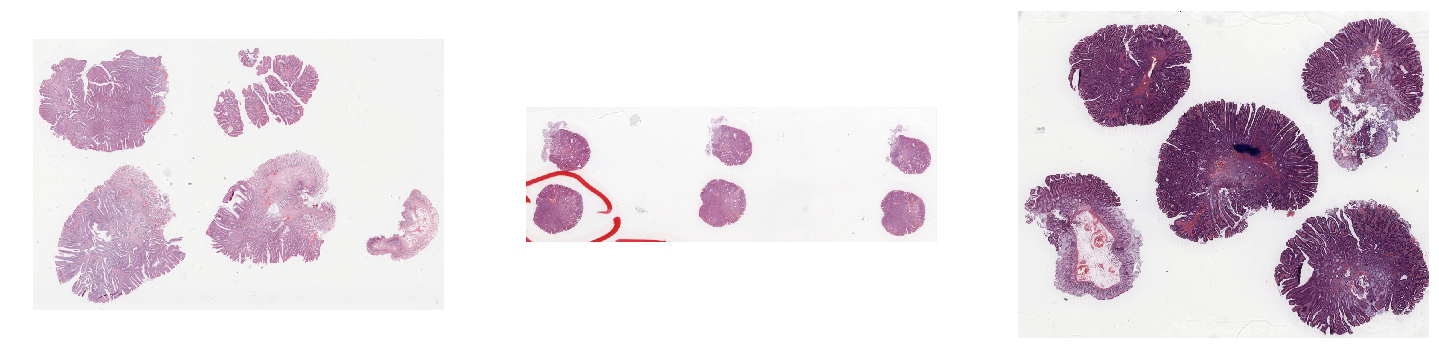

In [54]:
image_thumbs = []
for url in urls:
    image_thumbs.append(fs.fetch_thumbnail(url))
ysb.show_images(image_thumbs, 3, 1)

In [55]:
scales = []
for i, image in enumerate(image_thumbs):
    thumb_y, thumb_x, _ = np.shape(image)
    x, y = fs.fetch_size(urls[i])

    scale_x = x / thumb_x
    scale_y = y / thumb_y
    scale = (scale_x + scale_y) / 2.0
    scales.append(scale)

In [56]:
scales

[116.82754151472489, 169.09027552392433, 106.32169773818796]

Now parse the XML files.

In [57]:
image_coords = []
for path in paths:
    xml = minidom.parse(path)
    regions = xml.getElementsByTagName("Region")

    all_coords = []

    for region in regions:
        key = region.getElementsByTagName("Attribute")[0].attributes['Value'].value
        if key != 'NU': # Ignore circles for now
            vertices = region.getElementsByTagName("Vertex")
            coords = np.zeros((len(vertices), 2))

            for i, vertex in enumerate(vertices):
                coords[i][0] = vertex.attributes['X'].value
                coords[i][1] = vertex.attributes['Y'].value
            all_coords.append(coords)
    image_coords.append(all_coords)

In [58]:
ann_images = []
for i, all_coords in enumerate(image_coords):
    for coords in all_coords:
        annotated_image = fs.draw_boundary(image_thumbs[i], (x, y), coords, scales[i])
    ann_images.append(annotated_image)

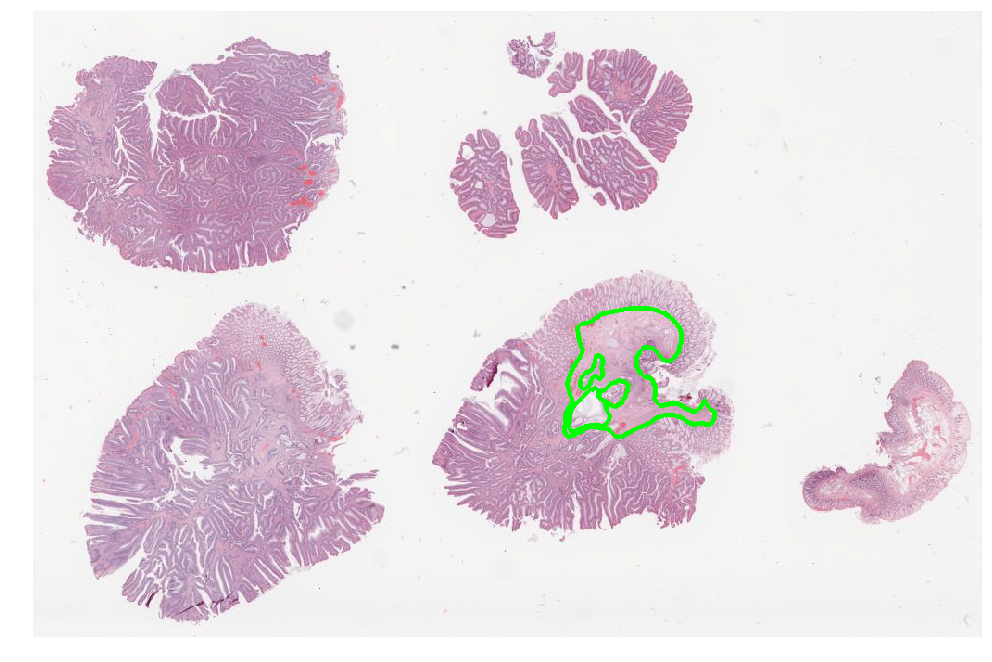

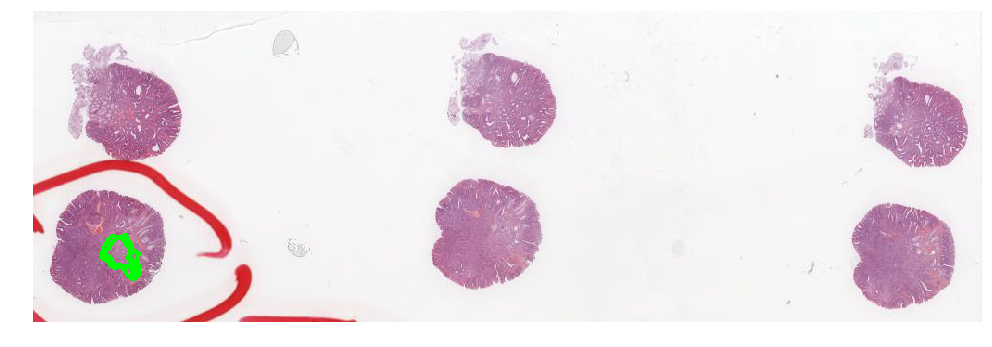

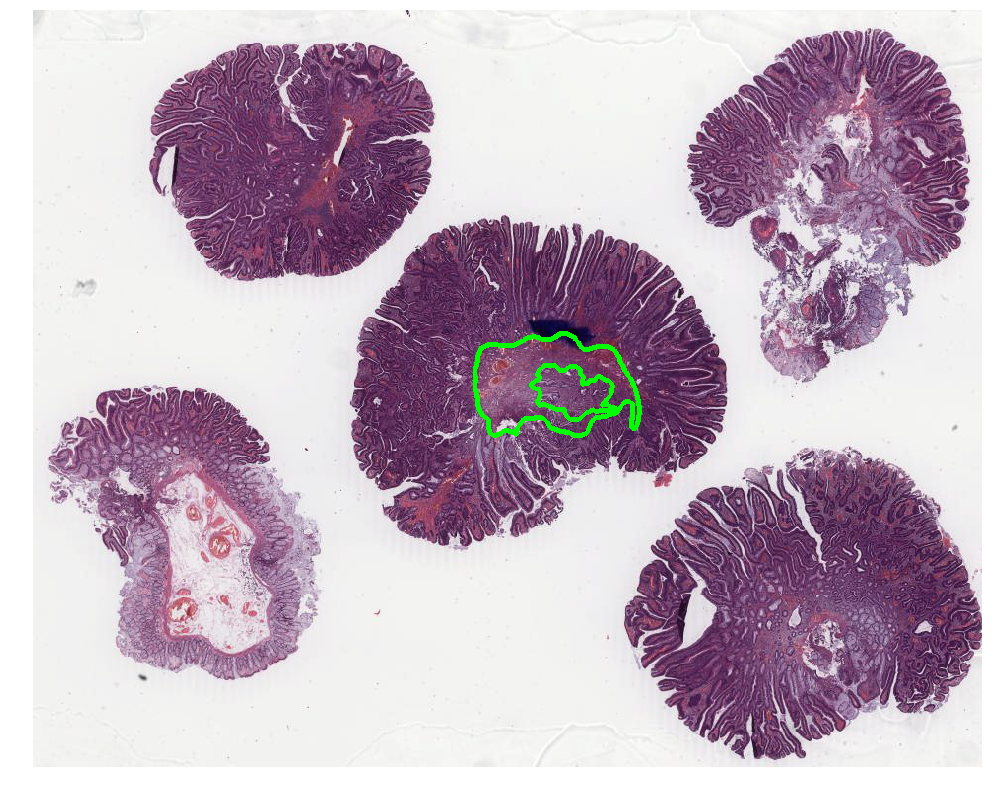

In [59]:
for ann_image in ann_images:
    plt.figure(figsize=(17,22))
    plt.imshow(ann_image)
    plt.axis("off")
    plt.show()
    plt.close()